In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from google.colab import files
import plotly.graph_objects as go
import matplotlib.ticker as mticker


# EDA Energy

****Consumption by State in 2022****

Summary: This is data from a goverment website that gives infromation on different types of energy information based on states. Some key indicators that we are using is ESTCB,TEPRB, and many others which are accreniems for different types of energy such as production or natural gas transportation. Most of the data is tabluar with realtively clean strucutre.

In [17]:
# EIA api key
API_key = "B3CtTT9IoNLOU88GFlJp8kG6BjrGkvK07hE8zc7g"

#Getting State Energy Data

url = "https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[seriesId][]=ESTCB&start=2000&end=2023&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

params = {
    "api_key": API_key,
}

response = requests.get(url, params=params)
print("Status Code:", response.status_code)
print("Response Text:", response.text)
data=response.json()
df = pd.DataFrame(data["response"]["data"])
df["value"] = df["value"].astype(float)
df = df[df["period"] == "2022"]
df = df[(df["stateId"] != "US") & (df["stateId"] != "DC")]
df['log_value'] = np.log(df['value'])




Status Code: 200
Response Text: {"response":{"total":"1196","dateFormat":"YYYY","frequency":"annual","data":[{"period":"2023","seriesId":"ESTCB","seriesDescription":"Electricity total consumption (electricity sales to ultimate customers)","stateId":"SD","stateDescription":"South Dakota","value":"46082","unit":"Billion Btu"},{"period":"2023","seriesId":"ESTCB","seriesDescription":"Electricity total consumption (electricity sales to ultimate customers)","stateId":"NM","stateDescription":"New Mexico","value":"96722","unit":"Billion Btu"},{"period":"2023","seriesId":"ESTCB","seriesDescription":"Electricity total consumption (electricity sales to ultimate customers)","stateId":"KY","stateDescription":"Kentucky","value":"243013","unit":"Billion Btu"},{"period":"2023","seriesId":"ESTCB","seriesDescription":"Electricity total consumption (electricity sales to ultimate customers)","stateId":"VT","stateDescription":"Vermont","value":"18302","unit":"Billion Btu"},{"period":"2023","seriesId":"ESTC

In [18]:

fig = go.Figure(go.Choropleth(
    z=df['log_value'],
    hoverinfo='location+z',
    locations=df['stateId'],
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title="Energy Consumption Log Scaled",
))

fig.update_geos(
    scope="usa",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    subunitcolor="gray",
)

fig.update_layout(
    title="Electricity Consumption by State in 2022",
    geo=dict(
        lakecolor="lightblue",
    ),
    font=dict(
        family="Arial",
        size=14,
    )
)

fig.show()

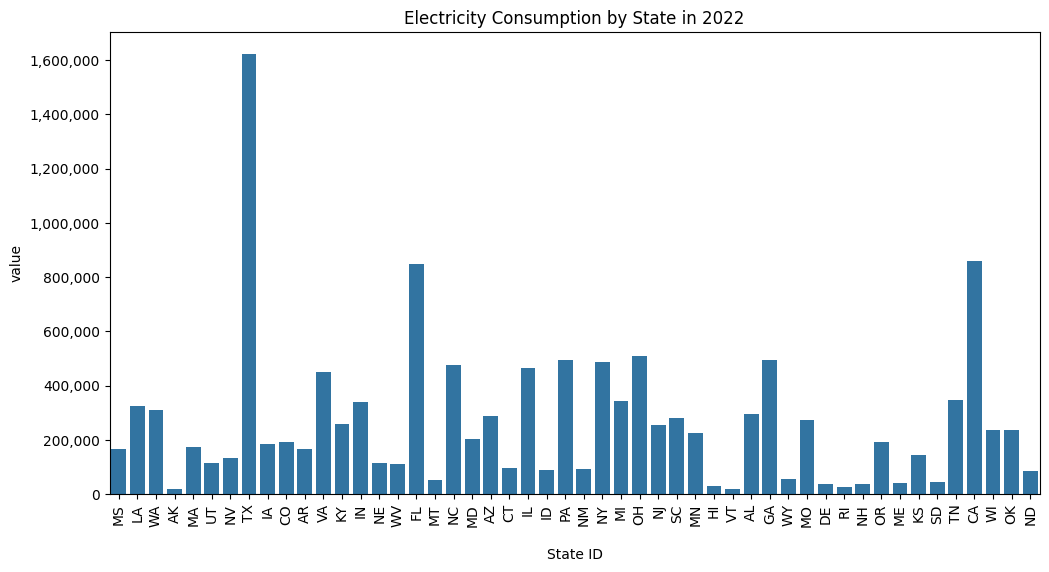

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='stateId', y='value', data=df)
plt.title("Electricity Consumption by State in 2022")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("State ID", labelpad=15)
plt.show()

****EDA of Production by State in 2022****

In [20]:
# Total Production by State
url = "https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[seriesId][]=TEPRB&start=2000&end=2023&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

params = {
    "api_key": API_key,
}

response = requests.get(url, params=params)
data=response.json()
df = pd.DataFrame(data["response"]["data"])
df["value"] = df["value"].astype(float)
df = df[df["period"] == "2022"]
df = df[(df["stateId"] != "US") & (df["stateId"] != "DC") & (df["stateId"] != "x5") & (df["stateId"] != "x3")]
df['normalized_value'] = (df['value'] - df['value'].min()) / (df['value'].max() - df['value'].min())
df['log_value'] = np.log(df['value'])


In [21]:
#Summary Statistics
print(df.info())
print(df[['value', 'log_value']].describe())


<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 53
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   period             52 non-null     object 
 1   seriesId           52 non-null     object 
 2   seriesDescription  52 non-null     object 
 3   stateId            52 non-null     object 
 4   stateDescription   52 non-null     object 
 5   value              52 non-null     float64
 6   unit               52 non-null     object 
 7   normalized_value   52 non-null     float64
 8   log_value          52 non-null     float64
dtypes: float64(3), object(6)
memory usage: 4.1+ KB
None
              value  log_value
count  5.200000e+01  52.000000
mean   1.892470e+06  13.149199
std    3.904548e+06   1.842403
min    2.829000e+03   7.947679
25%    2.192808e+05  12.298095
50%    5.946045e+05  13.294264
75%    1.411061e+06  14.157281
max    2.514239e+07  17.040066


In [22]:
fig = go.Figure(go.Choropleth(
    z=df['log_value'],
    hoverinfo='location+z',
    locations=df['stateId'],
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title="Energy Production Log Scaled",
))

fig.update_geos(
    scope="usa",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    subunitcolor="gray",
)

fig.update_layout(
    title="Electricity Production by State in 2022",
    geo=dict(lakecolor="lightblue"),
    font=dict(family="Arial", size=14),
)

fig.show()


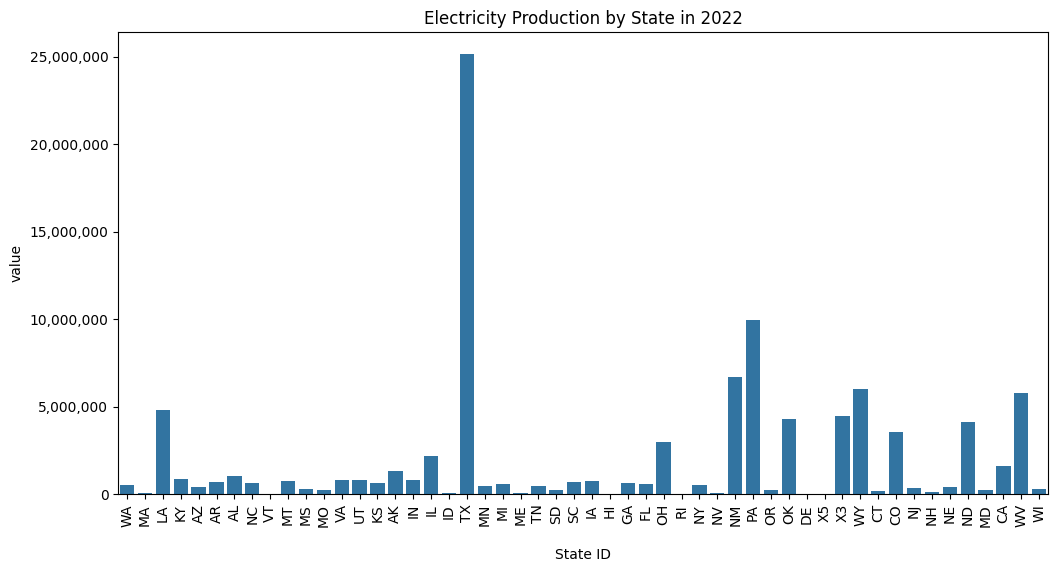

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='stateId', y='value', data=df)
plt.title("Electricity Production by State in 2022")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("State ID", labelpad=15)
plt.show()

In [24]:
#Summary Statistics
print(df.info())
print(df[['value', 'log_value']].describe())


<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 53
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   period             52 non-null     object 
 1   seriesId           52 non-null     object 
 2   seriesDescription  52 non-null     object 
 3   stateId            52 non-null     object 
 4   stateDescription   52 non-null     object 
 5   value              52 non-null     float64
 6   unit               52 non-null     object 
 7   normalized_value   52 non-null     float64
 8   log_value          52 non-null     float64
dtypes: float64(3), object(6)
memory usage: 4.1+ KB
None
              value  log_value
count  5.200000e+01  52.000000
mean   1.892470e+06  13.149199
std    3.904548e+06   1.842403
min    2.829000e+03   7.947679
25%    2.192808e+05  12.298095
50%    5.946045e+05  13.294264
75%    1.411061e+06  14.157281
max    2.514239e+07  17.040066


****EDA of Expenditures by State in 2022****

In [25]:
url = "https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[seriesId][]=TETCV&start=2000&end=2023&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
params = {"api_key": API_key}

response = requests.get(url, params=params)
data = response.json()
df = pd.DataFrame(data["response"]["data"])
df["value"] = df["value"].astype(float)
df = df[df["period"] == "2022"]
df = df[~df["stateId"].isin(["US", "DC", "x5", "x3"])]
df['normalized_value'] = (df['value'] - df['value'].min()) / (df['value'].max() - df['value'].min())
df['log_value'] = np.log(df['value'])

fig = go.Figure(go.Choropleth(
    z=df['log_value'],
    hoverinfo='location+z',
    locations=df['stateId'],
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title="Energy Expenditures Log Scaled",
))

fig.update_geos(
    scope="usa",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    subunitcolor="gray",
)

fig.update_layout(
    title="Total Energy Expenditures in 2022",
    geo=dict(lakecolor="lightblue"),
    font=dict(family="Arial", size=14),
)

fig.show()


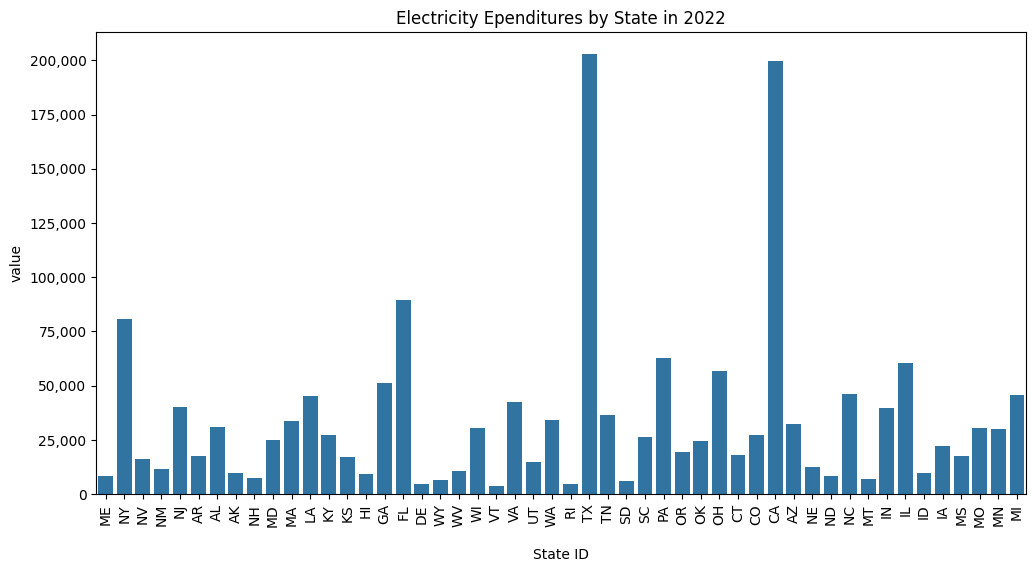

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='stateId', y='value', data=df)
plt.title("Electricity Ependitures by State in 2022")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("State ID", labelpad=15)
plt.show()

In [27]:
#Summary Statistics
print(df.info())
print(df[['value', 'log_value']].describe())


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   period             50 non-null     object 
 1   seriesId           50 non-null     object 
 2   seriesDescription  50 non-null     object 
 3   stateId            50 non-null     object 
 4   stateDescription   50 non-null     object 
 5   value              50 non-null     float64
 6   unit               50 non-null     object 
 7   normalized_value   50 non-null     float64
 8   log_value          50 non-null     float64
dtypes: float64(3), object(6)
memory usage: 3.9+ KB
None
               value  log_value
count      50.000000  50.000000
mean    34355.976000  10.026727
std     39599.322058   0.907276
min      3582.300000   8.183760
25%     11104.025000   9.314472
50%     25517.900000  10.146747
75%     39967.575000  10.595814
max    202825.600000  12.220102


****Natural Gas and its movement in 2022 Interstate****

In [28]:
API_key = "B3CtTT9IoNLOU88GFlJp8kG6BjrGkvK07hE8zc7g"


url = "https://api.eia.gov/v2/natural-gas/move/ist/data/?frequency=annual&data[0]=value&facets[process][]=MID&facets[process][]=MIN&facets[process][]=MIR&start=2022&end=2023&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

params = {
    "api_key": API_key,
}

response = requests.get(url, params=params)
data=response.json()
df = pd.DataFrame(data["response"]["data"])
df["value"] = df["value"].astype(float)
df = df[df["period"] == "2022"]




In [29]:
def clean_state_id(state):
    if state in ['NA', 'U.S.']:
        return None
    if state.startswith('USA-'):
        return state.split('-')[-1]
    state_abbreviation = {
        "MINNESOTA": "MN",
        "COLORADO": "CO",
        "CALIFORNIA": "CA",
        "TEXAS": "TX",
        "MASSACHUSETTS": "MA",
        "WASHINGTON": "WA",
        "NEW YORK": "NY",
        "FLORIDA": "FL",
        "MICHIGAN": "MI"
    }
    return state_abbreviation.get(state, state[:2].upper())

df['state_from'] = df['area-name'].apply(clean_state_id)


In [31]:
def extract_cleaned_text(text):
    if 'Natural Gas' in text:
        return text.split('Natural Gas')[0].strip()
    return text

df['state_recived'] = df['series-description'].apply(extract_cleaned_text)

df = df[(df['state_recived'] != "Federal Offshore--Gulf of Mexico") & (df['state_recived'] != "District of Columbia") & (df['state_recived'] != "District of Columbia") & (df['state_recived'] != "U.S.") & (df['state_recived'] != "Utah Interstate Movements: Receipts of") & (df['state_recived'] != "Idaho Interstate Movements: Deliveries of")]


In [32]:
def aggregate_state_values(df):

    df_received = df.groupby("state_recived", as_index=False)["value"].sum()
    df_received.rename(columns={"state_recived": "state", "value": "total_received"}, inplace=True)

    df_sent = df.groupby("state_from", as_index=False)["value"].sum()
    df_sent.rename(columns={"state_from": "state", "value": "total_sent"}, inplace=True)

    df_received["total_received_log"] = np.log1p(df_received["total_received"])
    df_sent["total_sent_log"] = np.log1p(df_sent["total_sent"])

    return df_received, df_sent

df_received, df_sent = aggregate_state_values(df)

us_state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
    "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM",
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

df_received["stateID"] = df_received["state"].map(us_state_abbrev)
df_sent["stateID"] = df_sent["state"].map(us_state_abbrev)

****Plot State Exports and Imports of Natural Gas via Interstate Movement****

In [33]:
fig = go.Figure(go.Choropleth(
    z=df_received['total_received'],
    locations=df_received['stateID'],
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title="",
))

fig.update_geos(
    scope="usa",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    subunitcolor="gray",
)

fig.update_layout(
    title="Natural Gas Imported by State",
    geo=dict(lakecolor="lightblue"),
    font=dict(family="Arial", size=14),
)

fig.show()


In [34]:
fig = go.Figure(go.Choropleth(
    z=df_sent['total_sent'],
    locations=df_sent['state'],
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title="",
))

fig.update_geos(
    scope="usa",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    subunitcolor="gray",
)

fig.update_layout(
    title="Natural Gas Exported by State",
    geo=dict(lakecolor="lightblue"),
    font=dict(family="Arial", size=14),
)

fig.show()



Some prelimenary insights are that there is many simaler states in exportation and importation of natural gas that helps to show many different relationships through interstate dependence on enegery as a whole. Looking deeper into this I would like to see if there is a correlation between expenditures and the overall production and consumption of energy. Furthering this I want to look deeper into the expenditures because we may be able to predict future spending projects by clustering simaliar states and projects from one another.

# EDA Transportation

Summary: 1. Summary of datasets:

The NHCCI Dataset contains 86 rows and 50 columns (86, 50), and it spans multiple quarters from Q1 in 2003 to recent years (Q2 2024). It tracks the National Highway Construction Cost Index (NHCCI), along with percentage changes in cost components that are related to the construction of highways (e.g Asphalt, Bridge, Guard Rail, etc). It includes seasonally adjusted and non-adjusted NHCCI values. The features are grouped under several cost categories and are there are 29 individual components that contribute to the overall price change in the NHCCI. The target variable representing this dataset is NHCCI, which represents the Cost Index over time. It is a float64 data type, and its purpose it to measure inflation in highway construction costs. Features include quarter (object), grp9- (% change in costs for general materials, float64), grp13- (% cgange in cost for more detailed categories, float64), and grp25- (more detailed breakdown, float64).

The TPFS (Transportation Public Financial Statistics) Dataset provides detailed financial data related to Department of Transportation's revenue and expenditures, tracking them across various governmental levels and modes of transportation. It also includes expenditure purposes, sources of revenue, and descriptions of the expenditures. The target variable is not explicitly defined, but we intend to explore the variable 'value' (represents current dollar financial amount for expenditures vs revenue). We also want to explore 'chained_value' as a target variable, which adjusts for inflation in the current financial amount). Key numerical features include the year, the value (current $ amount), chained_value, deflator (used for inflation adjustments), gov_level_sort_order (encoded gov't level, 0 = Federal, 1 = State & Local, etc). Key categorical features include cash_flow, own_supporting (indicates if revenue is self-generated or sourced externally), user_other (user-generated vs other revenue sources), and more like gov_level, trust_fund, etc.


   quarter     NHCCI  NHCCI-Seasonally-Adjusted  \
0  2003 Q1  1.000000                   1.001802   
1  2003 Q2  1.009624                   1.006849   
2  2003 Q3  1.023990                   1.012337   
3  2003 Q4  1.021636                   1.045312   
4  2004 Q1  1.045945                   1.052613   
5  2004 Q2  1.100941                   1.097688   
6  2004 Q3  1.143055                   1.128311   
7  2004 Q4  1.149222                   1.162400   
8  2005 Q1  1.240895                   1.251049   
9  2005 Q2  1.281448                   1.276989   

   grp9-pct-change-Grading-Excavation  grp9-pct-change-Bridge  \
0                                 NaN                     NaN   
1                           -0.603983               -0.075302   
2                            0.559155                0.493043   
3                           -0.483976                0.335125   
4                           -0.244710                1.095025   
5                            2.429802           

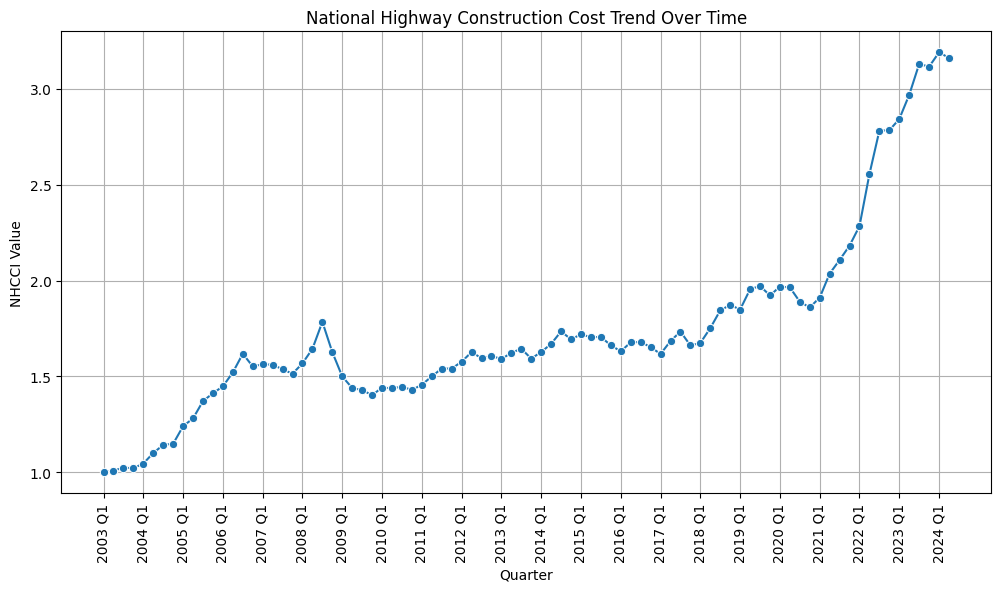

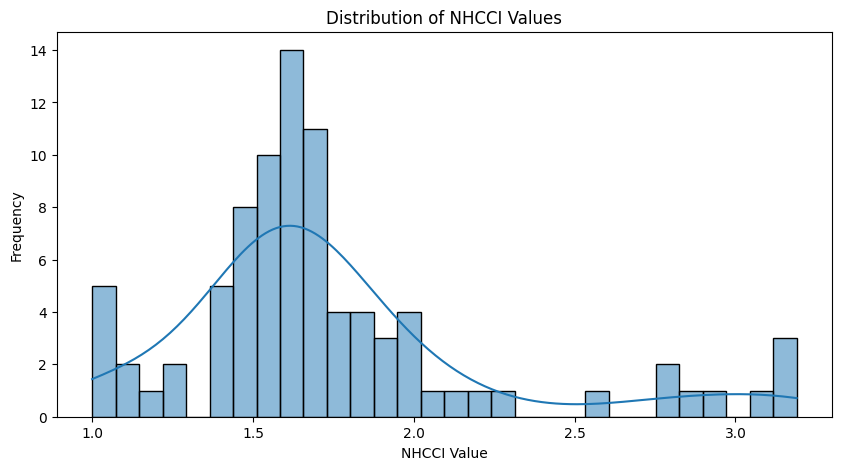

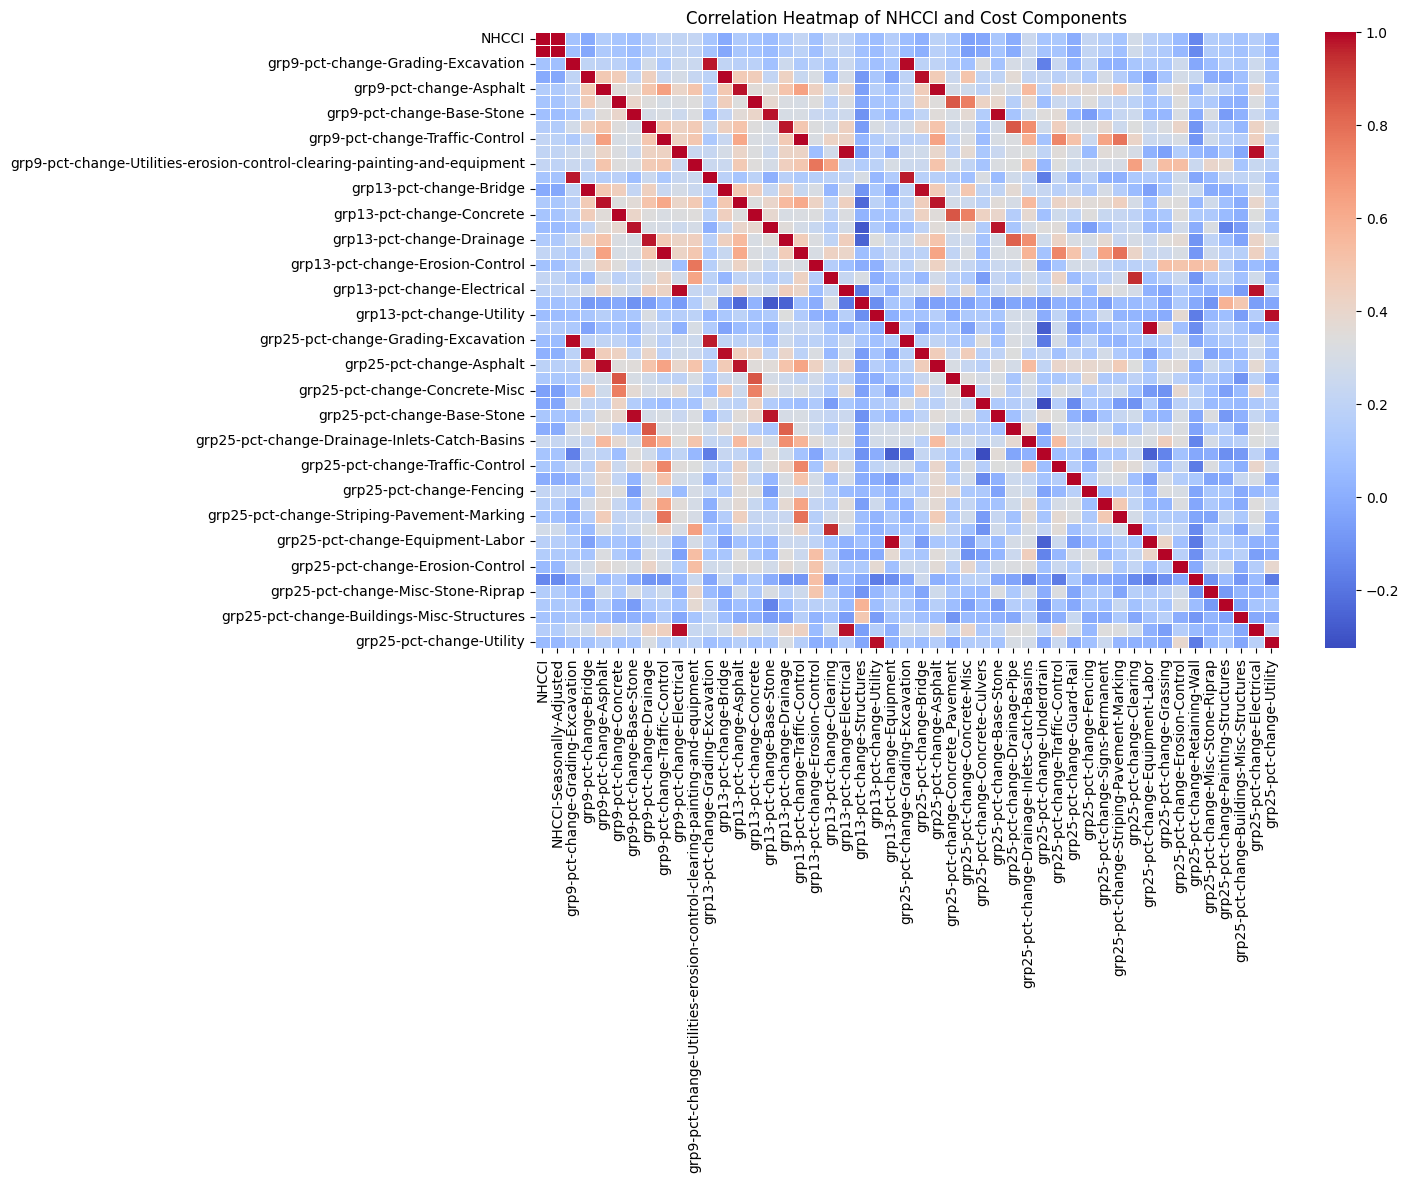

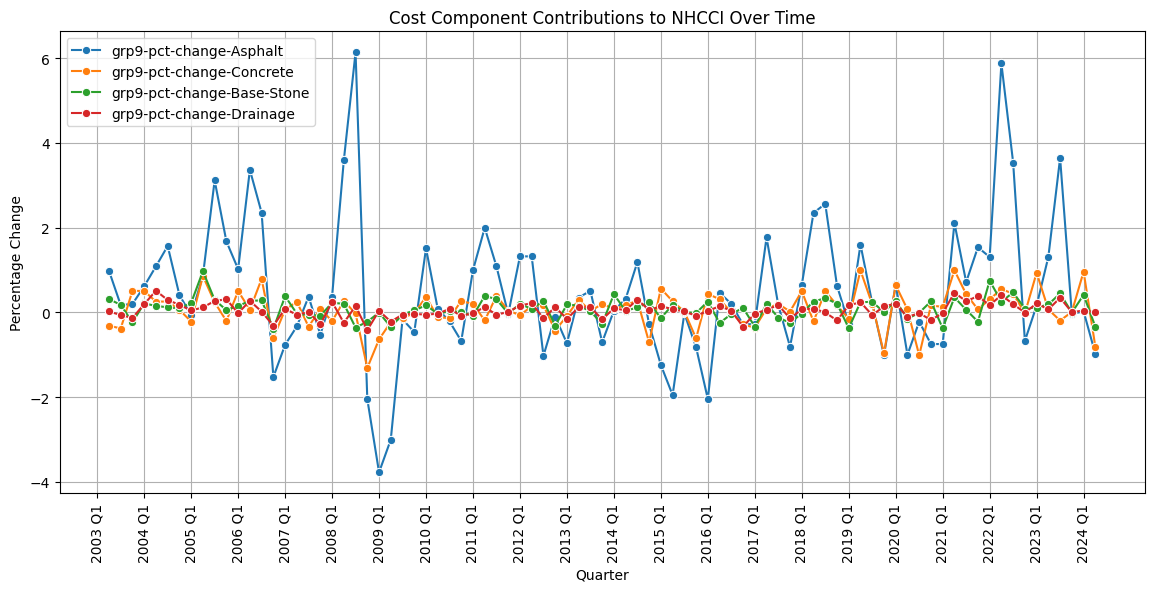

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings as wrngs

url = "https://raw.githubusercontent.com/bdishionn/CS163_FinalProject/refs/heads/main/NHCCI.csv"
df = pd.read_csv(url)

# Basic data insights
print(df.head(10))
print(f"Shape of the data \n {df.shape} \n")

print("Dataset Info: ")
df.info()
print("\n")

print(f"Description of numeric data: \n {df.describe()} \n")

print(f"Columns as list for reference: \n {df.columns.tolist()} \n")

df.replace(['-', 'N/A', 'NULL', '', 'None', 'NaN'], np.nan, inplace=True)
print("Counting missing entries")
print(df.isnull().sum())
print("\n")

print("Checking duplicate values: ")
duplicates = df.nunique()
print(duplicates)
print("\n")

plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter', y='NHCCI', data=df, marker='o')
xtick_positions = np.arange(0, len(df), step=4)
plt.xticks(df['quarter'][xtick_positions], rotation=90)
plt.title('National Highway Construction Cost Trend Over Time')
plt.xlabel('Quarter')
plt.ylabel('NHCCI Value')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['NHCCI'], bins=30, kde=True)
plt.title('Distribution of NHCCI Values')
plt.xlabel('NHCCI Value')
plt.ylabel('Frequency')
plt.show()

num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of NHCCI and Cost Components')
plt.show()

cost_components = [
    'grp9-pct-change-Asphalt', 'grp9-pct-change-Concrete',
    'grp9-pct-change-Base-Stone', 'grp9-pct-change-Drainage'
]
df_melted = df.melt(id_vars=['quarter'], value_vars=cost_components,
                     var_name='Component', value_name='Percentage Change')

plt.figure(figsize=(14, 6))
sns.lineplot(x='quarter', y='Percentage Change', hue='Component', data=df_melted, marker='o')
xtick_positions = np.arange(0, len(df), step=4)
plt.xticks(df['quarter'][xtick_positions], rotation=90)
plt.title('Cost Component Contributions to NHCCI Over Time')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid()
plt.show()

     cash_flow own_supporting user_other      trust_fund     exp_type  \
0  Expenditure              -          -           Total  Non-Capital   
1  Expenditure              -          -           Total  Non-Capital   
2  Expenditure              -          -  Non-Trust Fund  Non-Capital   
3  Expenditure              -          -           Total  Non-Capital   
4  Expenditure              -          -           Total  Non-Capital   
5  Expenditure              -          -  Non-Trust Fund  Non-Capital   
6  Expenditure              -          -  Non-Trust Fund  Non-Capital   
7      Revenue     Supporting      Other  Non-Trust Fund            -   
8  Expenditure              -          -           Total  Non-Capital   
9  Expenditure              -          -           Total  Non-Capital   

  gov_level                                 desccription  year       value  \
0     Total                                            -  2014  3961800000   
1     Total                             

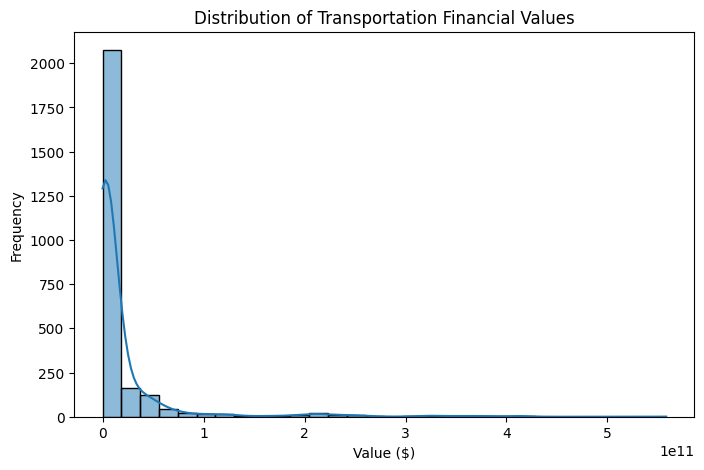

<ipython-input-39-ff6303b2dceb>:35: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



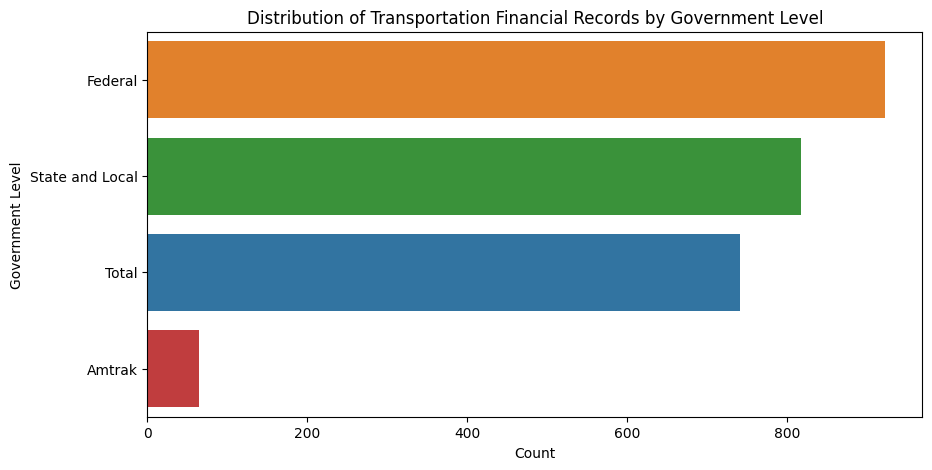

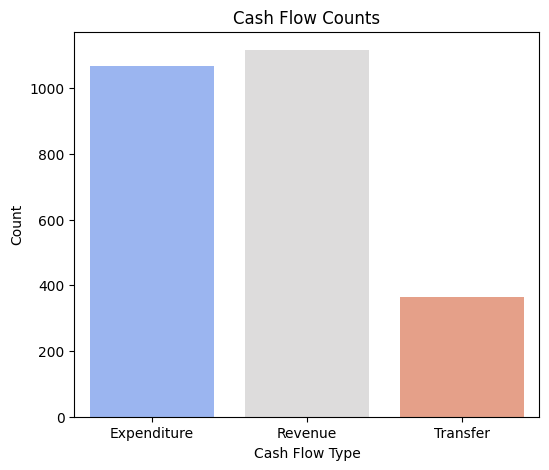

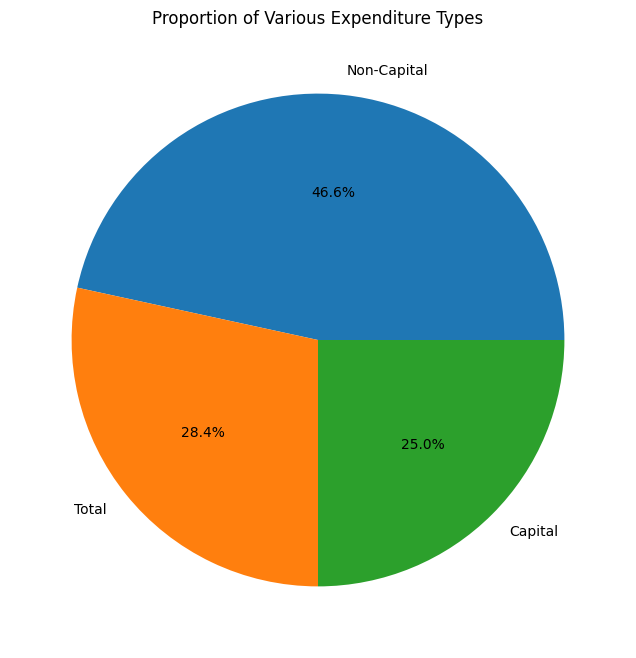

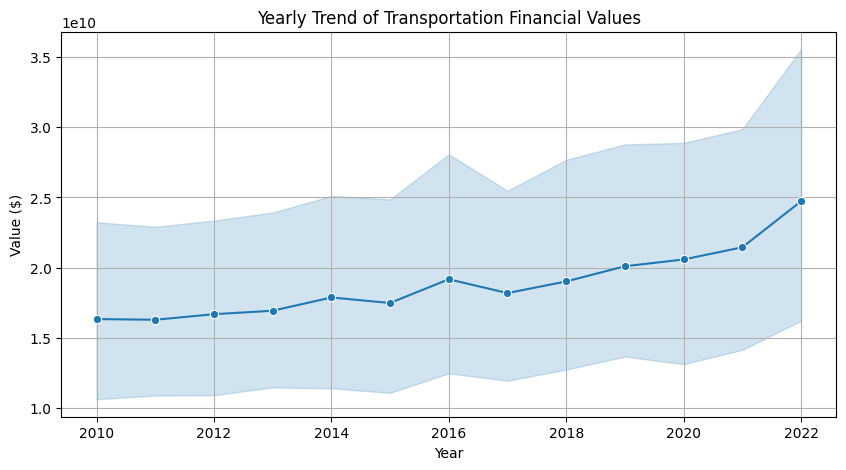

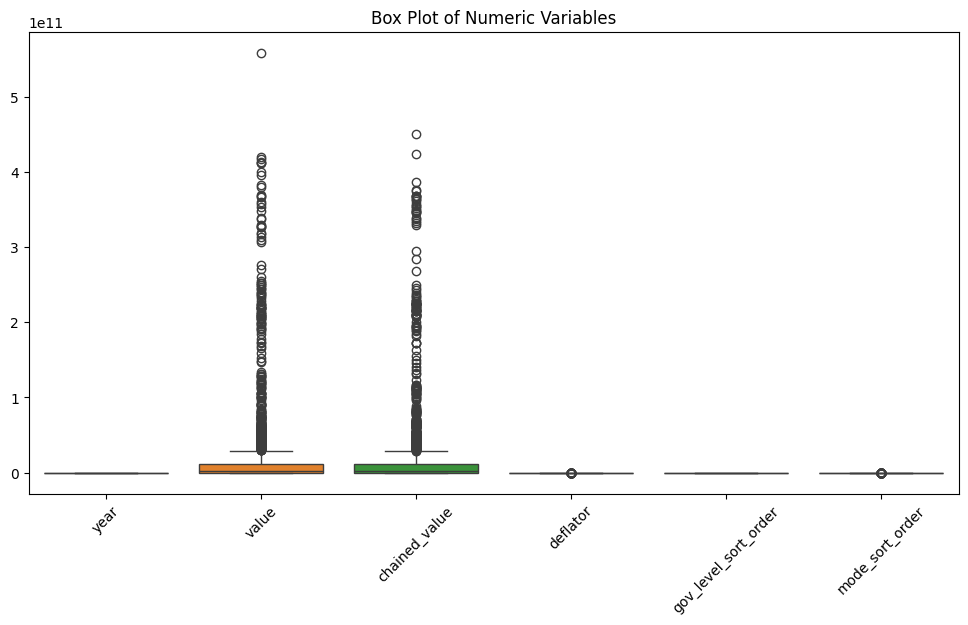

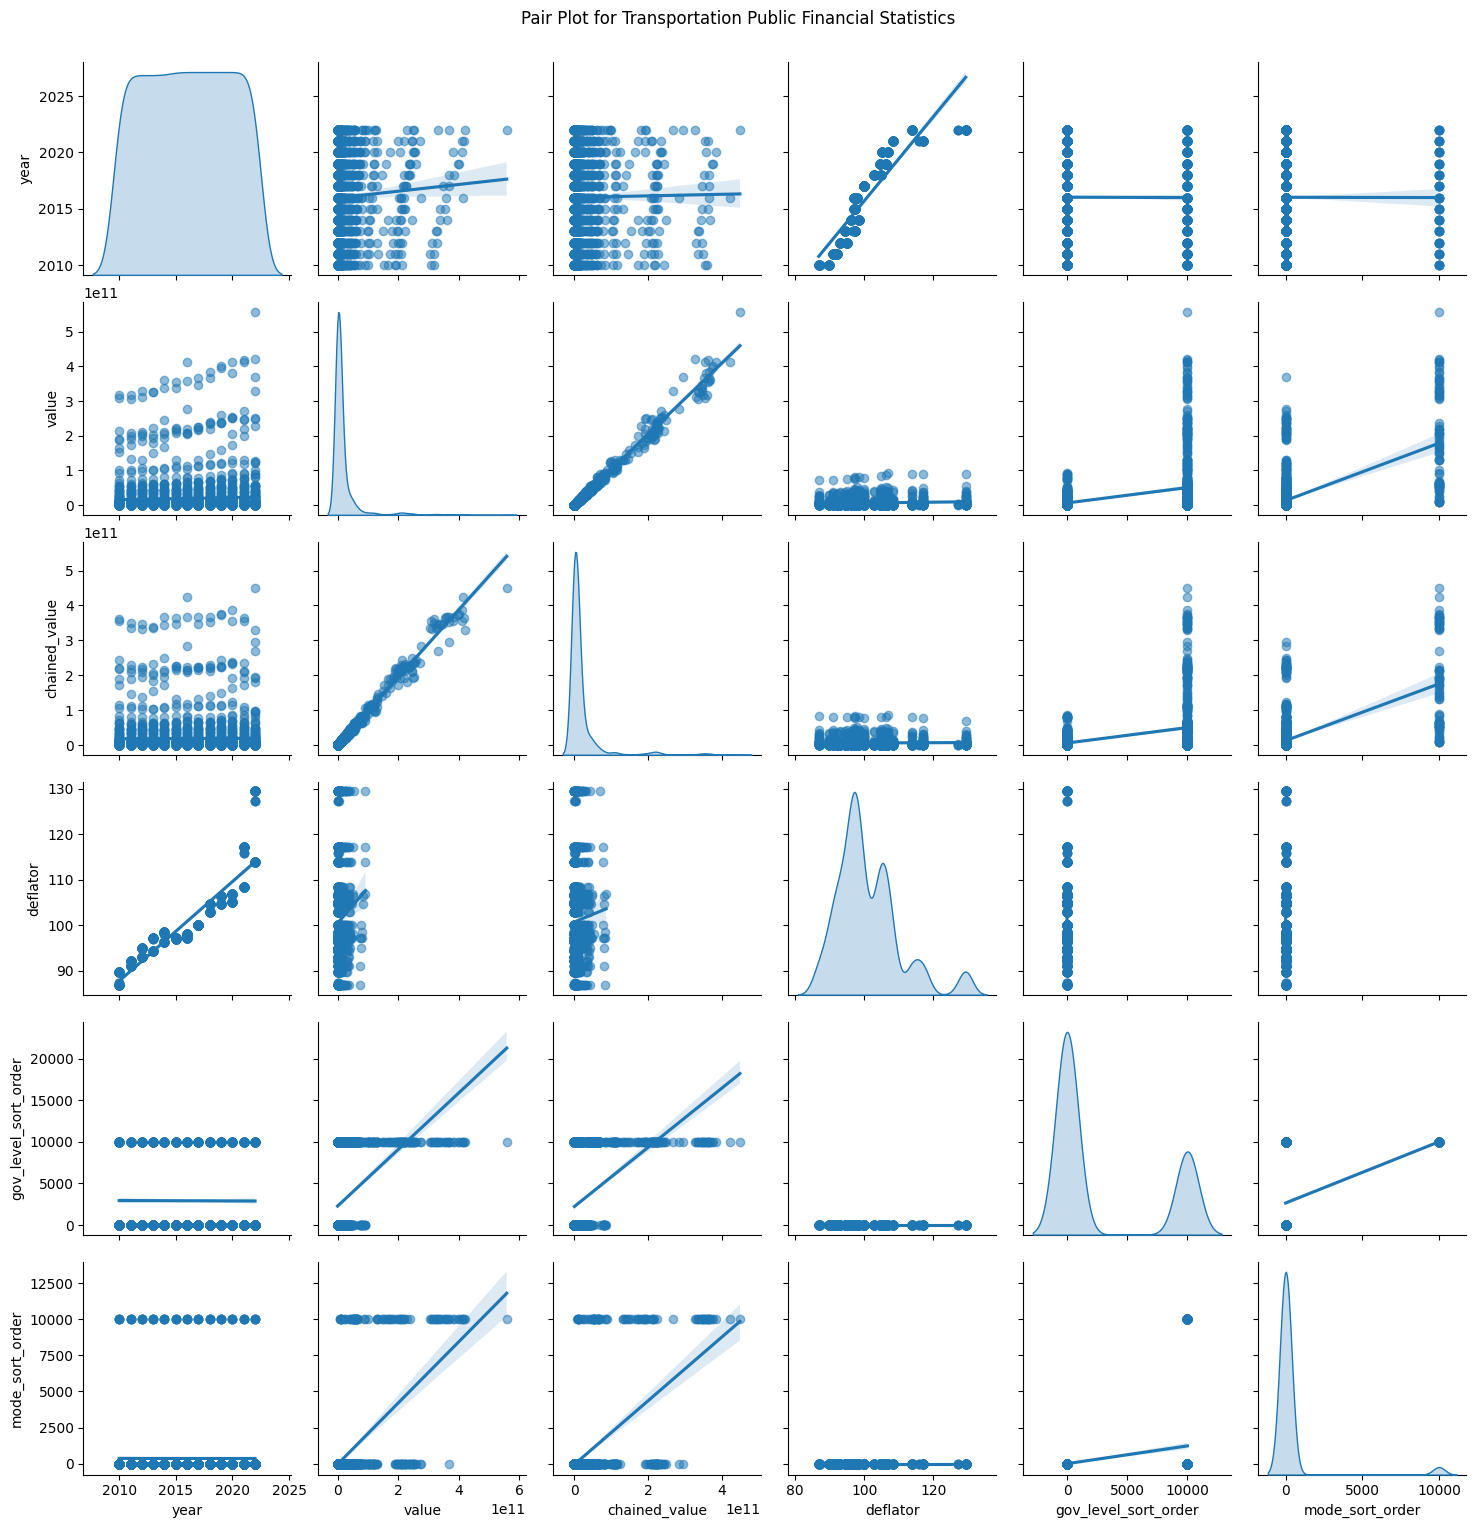

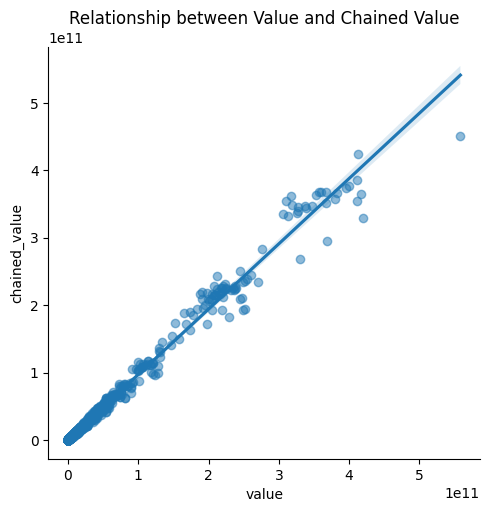

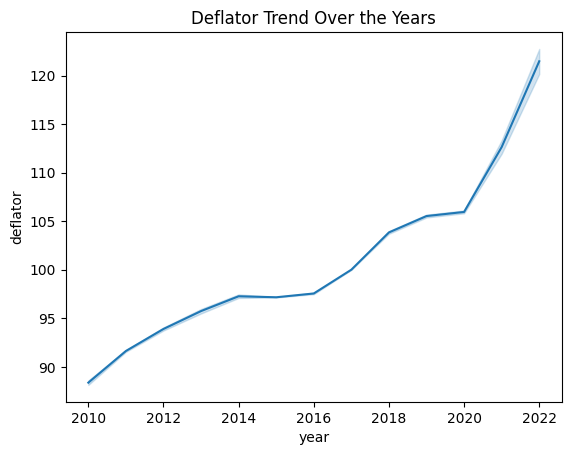

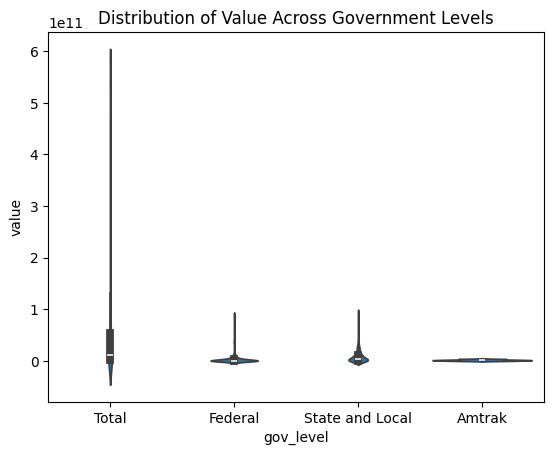

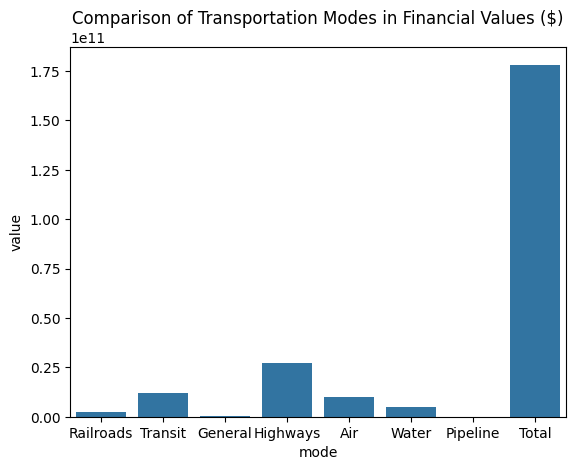

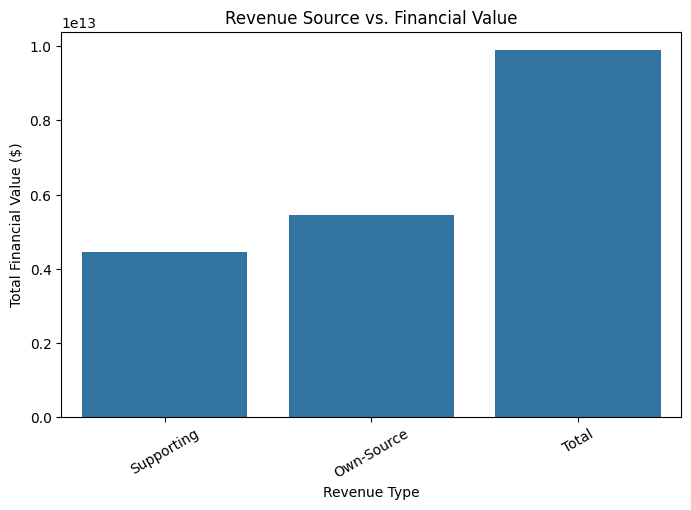

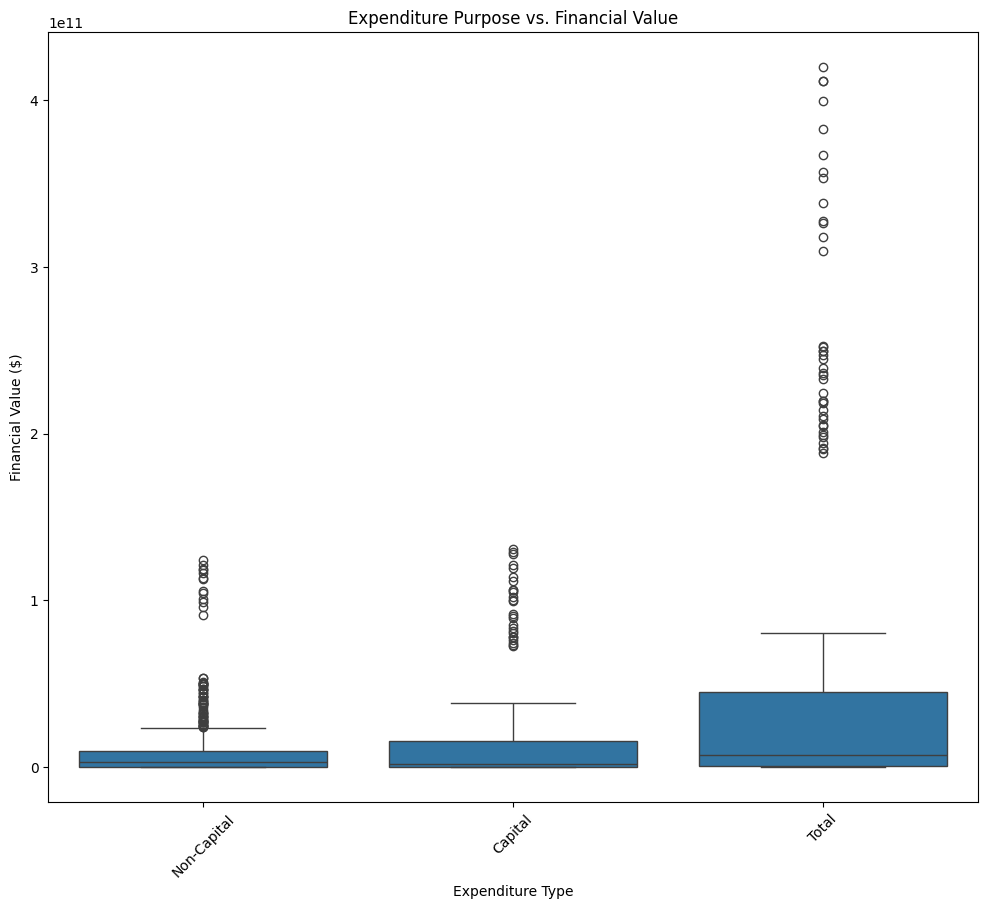

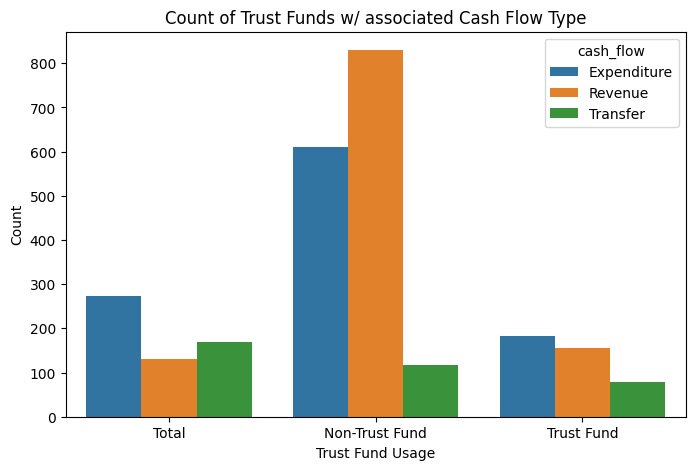

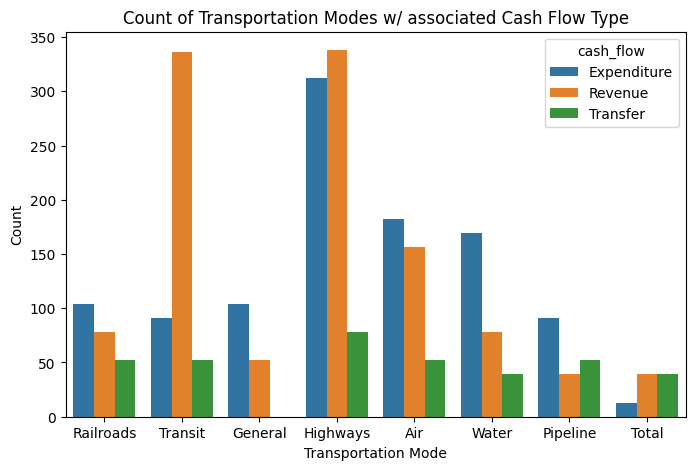

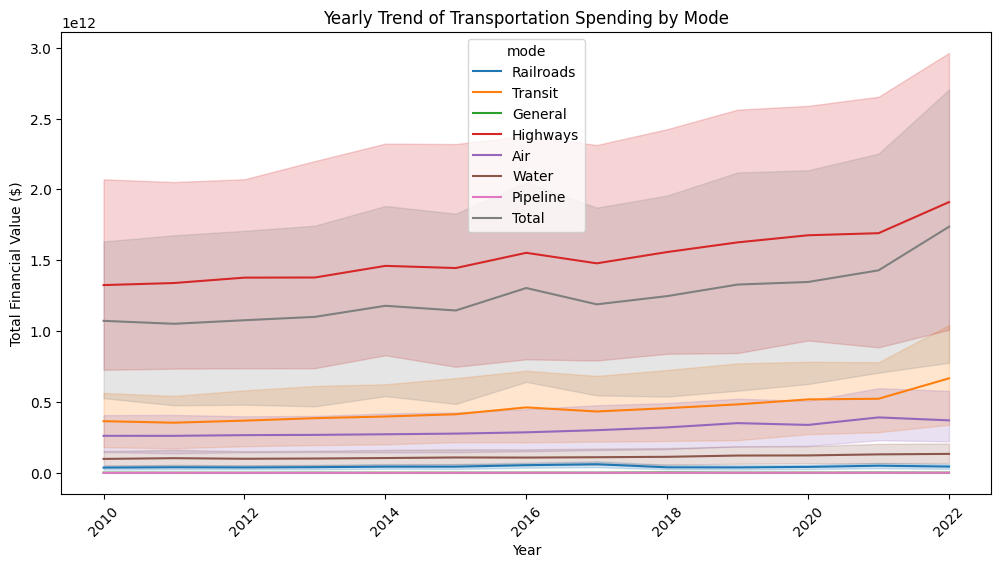

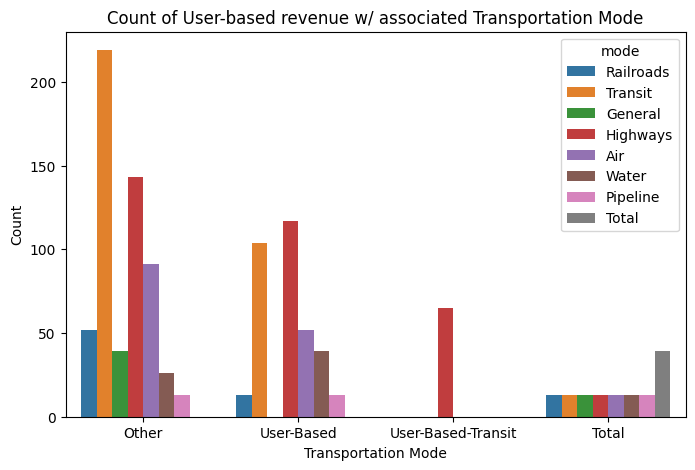

In [39]:

# Reading in dataset
url = "https://raw.githubusercontent.com/bdishionn/CS163_FinalProject/refs/heads/main/Transportation_Public_Finance_Statistics__TPFS_.csv"
df = pd.read_csv(url)

# Basic data insights
print(df.head(10))
print(f"Shape of the data \n {df.shape} \n")

print("Dataset Info: ")
df.info()
print("\n")

print(f"Description of numeric data: \n {df.describe()} \n")

print(f"Columns as list for reference: \n {df.columns.tolist()} \n")

df.replace(['-', 'N/A', 'NULL', '', 'None', 'NaN'], np.nan, inplace=True)
print("Counting missing entries")
print(df.isnull().sum())
print("\n")

print("Checking duplicate values: ")
duplicates = df.nunique()
print(duplicates)
print("\n")

plt.figure(figsize=(8,5))
sns.histplot(df['value'], bins=30, kde=True)
plt.title("Distribution of Transportation Financial Values")
plt.xlabel("Value ($)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=df['gov_level'], order=df['gov_level'].value_counts().index, hue=df['gov_level'], palette=sns.color_palette())
plt.title("Distribution of Transportation Financial Records by Government Level")
plt.xlabel("Count")
plt.ylabel("Government Level")
plt.show()

plt.figure(figsize=(6,5))
sns.countplot(x=df['cash_flow'], hue=df['cash_flow'], palette="coolwarm")
plt.title("Cash Flow Counts")
plt.xlabel("Cash Flow Type")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,8))
df['exp_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Proportion of Various Expenditure Types")
plt.ylabel("")
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x=df['year'], y=df['value'], marker='o')
plt.title("Yearly Trend of Transportation Financial Values")
plt.xlabel("Year")
plt.ylabel("Value ($)")
plt.grid()
plt.show()

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Box Plot of Numeric Variables")
plt.show()

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
sns.pairplot(df[numerical_columns], kind="reg", diag_kind="kde", plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.suptitle("Pair Plot for Transportation Public Financial Statistics", y=1.02)
plt.show()

sns.lmplot(x="value", y="chained_value", data=df, scatter_kws={'alpha':0.5})
plt.title("Relationship between Value and Chained Value")
plt.show()

sns.lineplot(x="year", y="deflator", data=df)
plt.title("Deflator Trend Over the Years")
plt.show()

sns.violinplot(x="gov_level", y="value", data=df)
plt.title("Distribution of Value Across Government Levels")
plt.show()

sns.barplot(x="mode", y="value", data=df, errorbar=None)
plt.title("Comparison of Transportation Modes in Financial Values ($)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="own_supporting", y="value", data=df, estimator=sum, errorbar=None)
plt.title("Revenue Source vs. Financial Value")
plt.xlabel("Revenue Type")
plt.ylabel("Total Financial Value ($)")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(12,10))
sns.boxplot(x="exp_type", y="value", data=df)
plt.title("Expenditure Purpose vs. Financial Value")
plt.xlabel("Expenditure Type")
plt.ylabel("Financial Value ($)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="trust_fund", hue="cash_flow", data=df)
plt.title("Count of Trust Funds w/ associated Cash Flow Type")
plt.xlabel("Trust Fund Usage")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="mode", hue="cash_flow", data=df)
plt.title("Count of Transportation Modes w/ associated Cash Flow Type")
plt.xlabel("Transportation Mode")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="value", hue="mode", data=df, estimator=sum)
plt.title("Yearly Trend of Transportation Spending by Mode")
plt.xlabel("Year")
plt.ylabel("Total Financial Value ($)")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x="user_other", hue="mode", data=df)
plt.title("Count of User-based revenue w/ associated Transportation Mode")
plt.xlabel("Transportation Mode")
plt.ylabel("Count")
plt.show()

5.5. NHCCI Hypothesis: Highway construction costs have been increasing over time, with certain materials like asphalt, concrete, and electrical work showing more volatility. Further analysis could help identify the key factors driving these fluctuations, such as inflation, labor costs, or supply chain disruptions.

TPFS Hypothesis: Federal and state governments may have distinct roles in transportation funding, with federal spending potentially focused on large infrastructure projects while state and local governments allocate funds for maintenance and operations. Analyzing the trends in user-generated revenue versus public funding could provide insights into the evolving financial structure of transportation investments.